ABALONE AGE PREDICTION

to automate the process of predicting the age of abalone from other physical measurements

Deliverable: Predict the number of rings for each abalone.
Machine Learning Task: Regression
Target Variable: Rings

In [ ]:
import pandas as pd       
                                        

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://github.com/Aparana-dinni/my-projects/blob/main/abalone_train.csv?raw=true")

In [ ]:
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (3341, 10)


,Id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,3141,I,0.180,0.135,0.080,0.0330,0.0145,0.0070,0.0100,5
1,3521,I,0.215,0.150,0.055,0.0410,0.0150,0.0090,0.0125,3
2,883,M,0.660,0.530,0.170,1.3905,0.5905,0.2120,0.4530,15
3,3627,M,0.715,0.525,0.200,1.8900,0.9500,0.4360,0.4305,10
4,2106,M,0.595,0.455,0.155,1.0410,0.4160,0.2105,0.3650,14


In [ ]:
data.describe()

,Id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2085.442083,0.525887,0.409463,0.140129,0.838176,0.363600,0.182507,0.241385,9.958396
std,1197.721846,0.119759,0.098895,0.042623,0.493789,0.224156,0.110439,0.139828,3.205591
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1055.000000,0.450000,0.350000,0.115000,0.444500,0.188000,0.093500,0.132000,8.000000
50%,2086.000000,0.545000,0.425000,0.145000,0.810000,0.341500,0.172500,0.235000,10.000000
75%,3114.000000,0.620000,0.485000,0.165000,1.168500,0.509500,0.255500,0.330000,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.779500,1.488000,0.760000,1.005000,27.000000


Observation:

There are no null values present data
Each feature seems to have correct data type, 

In [ ]:
data.isnull().any()


Id                False
Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Rings             False
dtype: bool

In [ ]:
data.duplicated().any()


False

In [ ]:
data.shape

(3341, 10)

In [ ]:
data['Age'] = data['Rings']+1.5
data.drop(['Rings','Id'],axis=1,inplace=True)



In [ ]:
data['Sex'].value_counts()


M    1232
F    1058
I    1051
Name: Sex, dtype: int64

In [ ]:
data['Sex'].replace({"M":0,"F":1,"I":2},inplace=True)
data['Sex'].value_counts()

0    1232
1    1058
2    1051
Name: Sex, dtype: int64

EDA on the data

1. id and sex column can be droped
2.need to generate heat map to check the corr()

5.1 Pre Profiling Report
For quick analysis pandas profiling is very handy.

Generates profile reports from a pandas DataFrame.

For each column statistics are presented in an interactive HTML report.

Note : To check your profiling please uncomment the code and run it

Feature selection

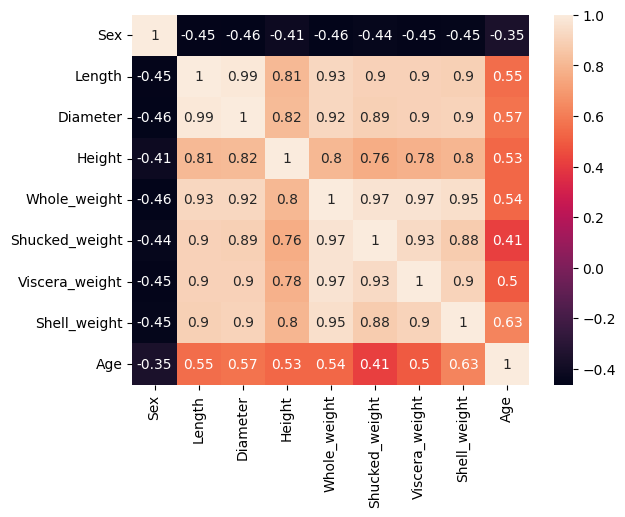

In [ ]:
sns.heatmap(data.corr(), annot=True );

colinearity exist between the independent variable

Bivariate Analysis
Bivariate analysis is vital part of data analysis process for, it gives clear picture on how each features are affected in presence of other features.
It also helps us understand and identify significance features, overcome multi-collinearity effect, inter-dependency and thus, provides insights on hidden data noise pattern.

In [ ]:
sns.pairplot(data, hue='Age')



checking for outliners

In [ ]:

data.columns


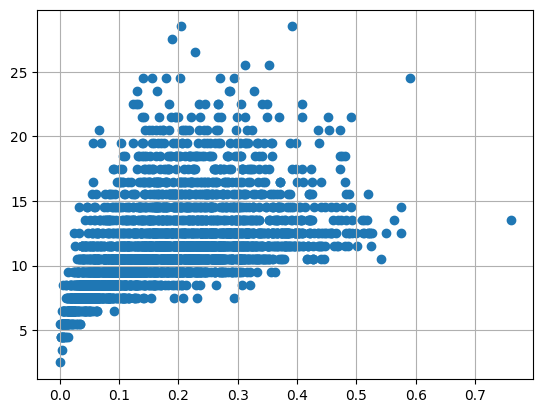

In [ ]:
plt.scatter(x = data['Viscera_weight'], y = data['Age'],)
plt.grid(True)

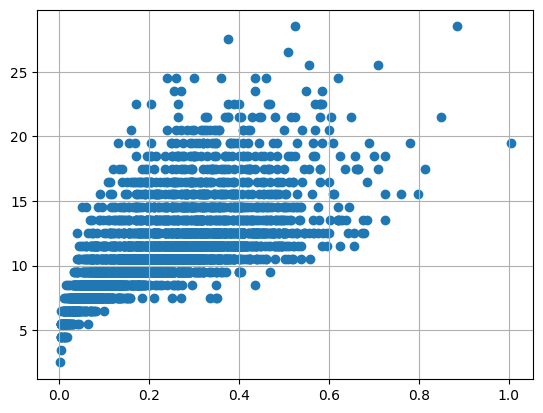

In [ ]:
plt.scatter(x = data['Shell_weight'], y = data['Age'],)
plt.grid(True)

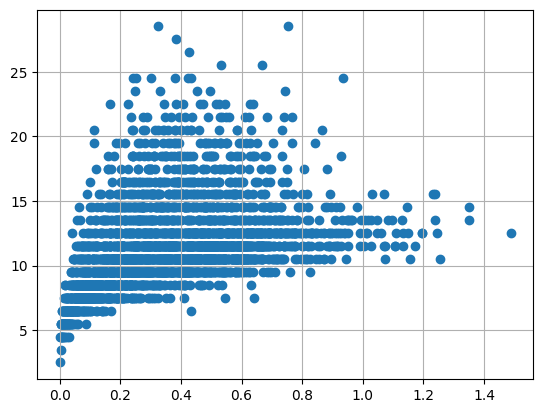

In [ ]:
plt.scatter(x = data['Shucked_weight'], y = data['Age'],)
plt.grid(True)

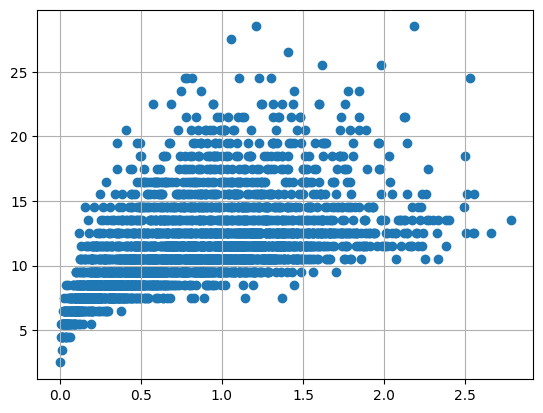

In [ ]:
plt.scatter(x = data['Whole_weight'], y = data['Age'],)
plt.grid(True)

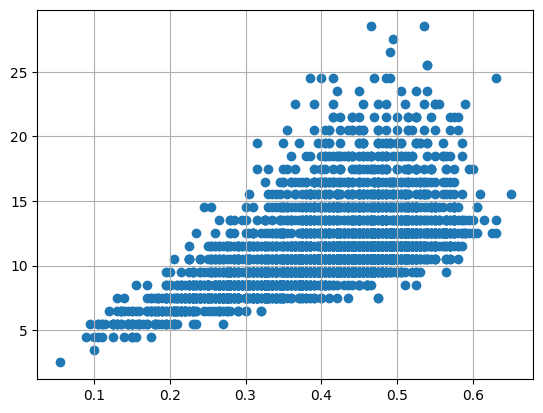

In [ ]:
plt.scatter(x = data['Diameter'], y = data['Age'],)
plt.grid(True)

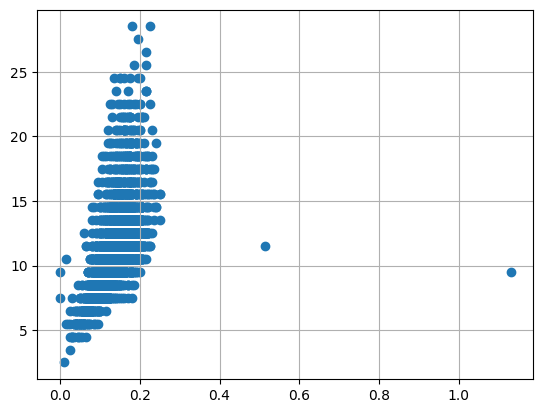

In [ ]:
plt.scatter(x = data['Height'], y = data['Age'],)
plt.grid(True)

In [ ]:
data_clean = data[data['Height']<0.4]

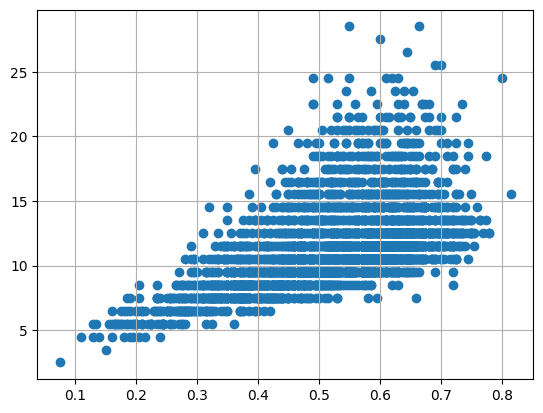

In [ ]:
plt.scatter(x = data_clean["Length"], y = data_clean['Age'],)
plt.grid(True)

<Axes: xlabel='Sex', ylabel='Age'>

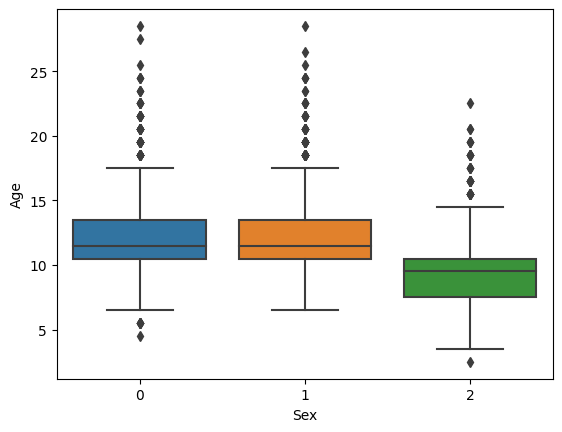

In [ ]:
sns.boxplot(x=data_clean["Sex"], y = data_clean['Age'])


splitting the data

In [ ]:
X = data_clean.drop('Age', axis = 1)
y = data_clean['Age']

In [ ]:
#  Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2671, 8) (2671,)
(668, 8) (668,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
print(X_train_transformed)

[[ 0.06149628 -0.30169741 -0.50199401 ... -0.90102073 -0.68138582
  -0.33268752]
 [-1.14627263  1.246213    1.47047832 ...  0.80668646  0.75412603
   1.58669886]
 [ 0.06149628  2.41760467  2.43142637 ...  2.34317821  2.13563744
   3.95038764]
 ...
 [ 0.06149628  0.32583383  0.40837783 ...  0.18853203  0.61012484
   0.30710794]
 [ 0.06149628 -0.05068492 -0.0973843  ... -0.30510208 -0.10088103
  -0.4037759 ]
 [ 0.06149628  1.246213    1.36932589 ...  1.42706446  1.68113369
   2.58193624]]


In [ ]:
X_test_transformed = scaler.transform(X_test)
print(X_test_transformed)

[[ 1.2692652   0.28399842  0.35780162 ...  0.02176375  0.03862012
  -0.04122514]
 [-1.14627263  0.91152967  1.0152924  ...  1.28920268  0.9071273
   2.40421528]
 [ 1.2692652  -2.85365783 -0.35026537 ... -0.74537034 -0.70388601
  -0.65258525]
 ...
 [-1.14627263  0.53501092  0.81298754 ...  0.86894661  0.47062369
   0.47772006]
 [-1.14627263  0.07482133  0.10492055 ... -0.06940291 -0.28088251
  -0.16562981]
 [ 0.06149628 -0.34353283 -0.35026537 ... -0.76093538 -0.460884
  -0.52107174]]


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

In [ ]:
y_test_pred = regressor.predict(X_test_transformed)


In [ ]:
actual_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
actual_predicted

In [ ]:
from sklearn import metrics
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print(metrics.r2_score(y_test, y_test_pred))

knn regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize KNN regressor with 3 neighbors
knn = KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Fit the model to the training data
knn.fit(X_train_transformed, y_train)

In [ ]:
# Make predictions on the testing data
y_test_pred = knn.predict(X_test_transformed)

In [ ]:
# Calculate mean squared error between actual and predicted values
mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error:", mse)

random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
# Fit the model to the training data
rf.fit(X_train_transformed, y_train)

# Make predictions on the testing data
y_test_pred = rf.predict(X_test_transformed)

In [ ]:
# Calculate mean squared error between actual and predicted values
mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error:", mse)

xgboost regressor

Saving the Model (Serialization)

In [ ]:
import xgboost as xgb

In [ ]:
# Initialize XGBoost regressor with default parameters
xgb_reg = xgb.XGBRegressor()

# Fit the model to the training data
xgb_reg.fit(X_train_transformed, y_train)

# Make predictions on the testing data
y_test_pred = xgb_reg.predict(X_test_transformed)

# Calculate mean squared error between actual and predicted values
mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error:", mse)

In [ ]:
!pwd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive')

In [ ]:
!pwd

In [ ]:
from pickle import dump
!mkdir -p /content/drive/MyDrive/model
dump(scaler, open('/content/drive/MyDrive/model/standard_scaler.pkl', 'wb'))
dump(knn, open('./model/knn_model.pkl', 'wb'))
dump(regressor, open('model/lr_model.pkl', 'wb'))
dump(rf, open('model/rf_model.pkl', 'wb'))
dump(xgb_reg, open('model/xgb_model.pkl', 'wb'))